In [1]:
import tensorflow as tf

/Users/andy/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load data

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 查看資料
print('train',mnist.train.num_examples,
      ',validation',mnist.validation.num_examples,
      ',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


In [4]:
# 查看訓練資料
print('train images :', mnist.train.images.shape,
      'labels:', mnist.train.labels.shape)

train images : (55000, 784) labels: (55000, 10)


In [5]:
len(mnist.train.images[0])

784

## 建立模型

In [6]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None: # 如果沒有傳入激活函數就不使用
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [7]:
# 建立輸出層X
x = tf.placeholder('float', [None, 784])

In [8]:
# 建立隱藏層h1
h1 = layer(output_dim=256, input_dim=784, inputs=x, activation=tf.nn.relu)

In [9]:
# 建立輸出層y
y_predict = layer(output_dim=10, input_dim=256, inputs=h1, activation=None)

## 定義訓練方式

In [10]:
# 定義真實值
y_label = tf.placeholder('float', [None, 10])

In [11]:
# 定義loss function
# reduce mean將結果計算成平均
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [12]:
# 定義optimizer最優化方法，梯度下降法
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

## 定義模型評估準確率

In [13]:
# tf equal判斷兩者值是否相等，相等回傳1, 不相等回傳0
# 真實和預測值因都被轉成one hot encoding，使用tf argmax轉回數字0~9
# Ex. 000000100 -> 7
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))

In [14]:
# 計算平均正確率
# tf cast轉換為float
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

## 進行訓練

In [15]:
# 定義訓練參數
from time import time
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize) # 55000/100
loss_list, epoch_list, accuracy_list = [], [], []
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
# 進行訓練
for epoch in range(trainEpochs): # 執行15次epoch訓練週期
    for i in range(totalBatchs):  # 每一個epoch執行550批次訓練
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy], feed_dict={x: mnist.validation.images, 
                                                             y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.772115707  Accuracy= 0.8432
Train Epoch: 02 Loss= 4.377612591  Accuracy= 0.8862
Train Epoch: 03 Loss= 3.353326559  Accuracy= 0.905
Train Epoch: 04 Loss= 2.768825293  Accuracy= 0.918
Train Epoch: 05 Loss= 2.345301628  Accuracy= 0.923
Train Epoch: 06 Loss= 2.069664955  Accuracy= 0.928
Train Epoch: 07 Loss= 1.874539018  Accuracy= 0.933
Train Epoch: 08 Loss= 1.744543791  Accuracy= 0.9328
Train Epoch: 09 Loss= 1.645446301  Accuracy= 0.9364
Train Epoch: 10 Loss= 1.576458693  Accuracy= 0.9362
Train Epoch: 11 Loss= 1.456022263  Accuracy= 0.9388
Train Epoch: 12 Loss= 1.441389561  Accuracy= 0.942
Train Epoch: 13 Loss= 1.384347796  Accuracy= 0.9424
Train Epoch: 14 Loss= 1.308917522  Accuracy= 0.9424
Train Epoch: 15 Loss= 1.311075449  Accuracy= 0.9426
Train Finished takes: 24.129290103912354


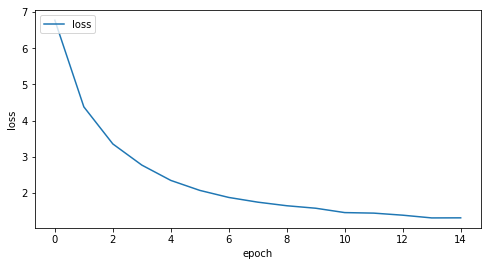

In [17]:
import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list, label = 'loss')
plt.gcf().set_size_inches(8,4)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

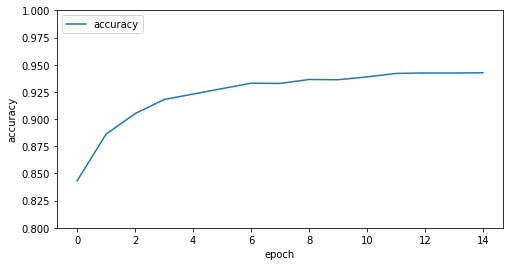

In [18]:
plt.plot(epoch_list, accuracy_list, label = 'accuracy')
plt.gcf().set_size_inches(8,4)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

## 評估模型準確率

In [19]:
print('Accuracy', sess.run(accuracy, feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

Accuracy 0.9436


## 進行預測

In [20]:
# tf argmax將one hot encoding轉回數字0~9
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x: mnist.test.images})

In [21]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [22]:
import numpy as np
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #傳入參數數字影像、真實值、預測結果、開始顯示資料、資料筆數
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(np.reshape(images[idx],(28, 28)), cmap='binary') #畫出subgraph
        title= "label=" +str(np.argmax(labels[idx])) #設定title,顯示標籤
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) #如果有傳入預測結果，title加入預設結果
        ax.set_title(title,fontsize=10)  #設定title與大小
        ax.set_xticks([]) #不顯示刻度
        ax.set_yticks([])     
        idx+=1 #讀取下一筆
    plt.show()

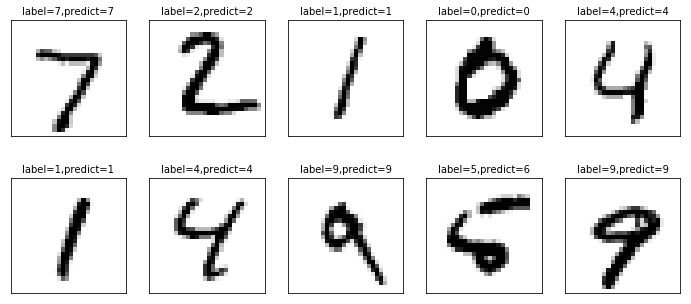

In [23]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

## 隱藏層加入更多神經元

In [24]:
# 建立輸出層X
x = tf.placeholder('float', [None, 784])

# 修改隱藏層h1，輸出1000神經元
h1 = layer(output_dim=1000, input_dim=784, inputs=x, activation=tf.nn.relu)

# 修改輸出層y，輸入1000神經元
y_predict = layer(output_dim=10, input_dim=1000, inputs=h1, activation=None)

# 進行訓練
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy], feed_dict={x: mnist.validation.images, 
                                                             y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 1.259173393  Accuracy= 0.9436
Train Epoch: 02 Loss= 1.292226553  Accuracy= 0.9444
Train Epoch: 03 Loss= 1.228118300  Accuracy= 0.9468
Train Epoch: 04 Loss= 1.179702759  Accuracy= 0.9464
Train Epoch: 05 Loss= 1.156015515  Accuracy= 0.9468
Train Epoch: 06 Loss= 1.125302553  Accuracy= 0.948
Train Epoch: 07 Loss= 1.150424004  Accuracy= 0.948
Train Epoch: 08 Loss= 1.163359165  Accuracy= 0.9464
Train Epoch: 09 Loss= 1.163047314  Accuracy= 0.9508
Train Epoch: 10 Loss= 1.135181308  Accuracy= 0.9484
Train Epoch: 11 Loss= 1.119867325  Accuracy= 0.9484
Train Epoch: 12 Loss= 1.095458388  Accuracy= 0.9518
Train Epoch: 13 Loss= 1.059702158  Accuracy= 0.952
Train Epoch: 14 Loss= 1.110637069  Accuracy= 0.9524
Train Epoch: 15 Loss= 1.105031013  Accuracy= 0.9498
Train Finished takes: 72.99324107170105


In [25]:
print('Accuracy', sess.run(accuracy, feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

Accuracy 0.9527


## 修改包含兩層隱藏層

In [26]:
# 建立輸出層X
x = tf.placeholder('float', [None, 784])

# 建立隱藏層h1
h1 = layer(output_dim=1000, input_dim=784, inputs=x, activation=tf.nn.relu)

# 建立隱藏層h2
h2 = layer(output_dim=1000, input_dim=1000, inputs=h1, activation=tf.nn.relu)

# 修改input為h2
y_predict = layer(output_dim=10, input_dim=1000, inputs=h2, activation=None)

# 進行訓練
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy], feed_dict={x: mnist.validation.images, 
                                                             y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 1.044228911  Accuracy= 0.954
Train Epoch: 02 Loss= 1.062959909  Accuracy= 0.952
Train Epoch: 03 Loss= 1.085288167  Accuracy= 0.9546
Train Epoch: 04 Loss= 1.026239753  Accuracy= 0.9556
Train Epoch: 05 Loss= 1.085622072  Accuracy= 0.9556
Train Epoch: 06 Loss= 1.028707623  Accuracy= 0.9558
Train Epoch: 07 Loss= 1.059377789  Accuracy= 0.9532
Train Epoch: 08 Loss= 1.025367141  Accuracy= 0.9536
Train Epoch: 09 Loss= 0.985770047  Accuracy= 0.9566
Train Epoch: 10 Loss= 1.034458160  Accuracy= 0.9566
Train Epoch: 11 Loss= 1.034474611  Accuracy= 0.9586
Train Epoch: 12 Loss= 0.975581825  Accuracy= 0.9586
Train Epoch: 13 Loss= 1.006340981  Accuracy= 0.957
Train Epoch: 14 Loss= 1.009364009  Accuracy= 0.9558
Train Epoch: 15 Loss= 1.022672296  Accuracy= 0.957
Train Finished takes: 250.46569800376892


In [27]:
print('Accuracy', sess.run(accuracy, feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

Accuracy 0.9557
